In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,roc_curve,confusion_matrix,auc

In [18]:
import matplotlib.pyplot as plt

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Midsem_LogR.csv')

In [3]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [4]:
X = df[['gre', 'gpa', 'rank']]
y = df['admit']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [7]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [9]:
y_pred = log_reg.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.91      0.78        53
           1       0.50      0.19      0.27        27

    accuracy                           0.66        80
   macro avg       0.59      0.55      0.53        80
weighted avg       0.62      0.66      0.61        80



In [10]:
accuracy = accuracy_score(y_test, y_pred)

In [11]:
accuracy

0.6625

In [12]:
conf_mat = confusion_matrix(y_test,y_pred)

In [13]:
conf_mat

array([[48,  5],
       [22,  5]], dtype=int64)

In [15]:
y_prob = log_reg.predict_proba(X_test)[:, 1]

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

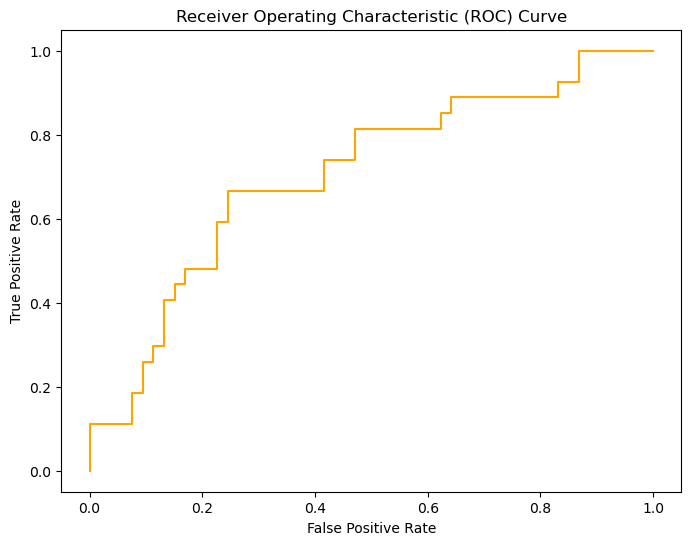

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [23]:
new_candidate = [[600, 3.5, 3]]

In [26]:
predicted_class = log_reg.predict(new_candidate)

In [29]:
print('The new candidate will belong to class: ',predicted_class)

The new candidate will belong to class:  [0]
